# Factor Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_excel('./NutritionalFacts_Fruit_Vegetables_Seafood.xlsx')

In [14]:
data.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,"Asparagus, 5 spears (93 g/3.3 oz)",20,0,0.0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
1,"Bell Pepper, 1 medium (148 g/5.3 oz)",25,0,0.0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45,0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30,0,0.0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25,0,0.0,0,30,1,270,8,5,...,2,0,100,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


In [15]:
# for checking categorical values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Food and Serving       61 non-null     object 
 1   Calories               61 non-null     int64  
 2   CaloriesÊfrom Fat      61 non-null     int64  
 3   Total Fat              61 non-null     float64
 4   Total Fat.1            61 non-null     int64  
 5   Sodium                 61 non-null     int64  
 6   Sodium.1               61 non-null     int64  
 7   Potassium              61 non-null     int64  
 8   Potassium.1            61 non-null     int64  
 9   Total Carbo-hydrate    61 non-null     int64  
 10  Total Carbo-hydrate.1  61 non-null     int64  
 11  Dietary Fiber          40 non-null     float64
 12  Dietary Fiber.1        40 non-null     float64
 13  Sugars                 40 non-null     float64
 14  Protein                61 non-null     int64  
 15  Vitamin 

In [16]:
data=data.iloc[:,1:19]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Calories               61 non-null     int64  
 1   CaloriesÊfrom Fat      61 non-null     int64  
 2   Total Fat              61 non-null     float64
 3   Total Fat.1            61 non-null     int64  
 4   Sodium                 61 non-null     int64  
 5   Sodium.1               61 non-null     int64  
 6   Potassium              61 non-null     int64  
 7   Potassium.1            61 non-null     int64  
 8   Total Carbo-hydrate    61 non-null     int64  
 9   Total Carbo-hydrate.1  61 non-null     int64  
 10  Dietary Fiber          40 non-null     float64
 11  Dietary Fiber.1        40 non-null     float64
 12  Sugars                 40 non-null     float64
 13  Protein                61 non-null     int64  
 14  Vitamin A              61 non-null     int64  
 15  Vitamin 

In [18]:
# checking and dropping null values
data.isnull().sum()

Calories                  0
CaloriesÊfrom Fat         0
Total Fat                 0
Total Fat.1               0
Sodium                    0
Sodium.1                  0
Potassium                 0
Potassium.1               0
Total Carbo-hydrate       0
Total Carbo-hydrate.1     0
Dietary Fiber            21
Dietary Fiber.1          21
Sugars                   21
Protein                   0
Vitamin A                 0
Vitamin C                 0
Calcium                   0
ÊÊIronÊÊ                  0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

Calories                 0
CaloriesÊfrom Fat        0
Total Fat                0
Total Fat.1              0
Sodium                   0
Sodium.1                 0
Potassium                0
Potassium.1              0
Total Carbo-hydrate      0
Total Carbo-hydrate.1    0
Dietary Fiber            0
Dietary Fiber.1          0
Sugars                   0
Protein                  0
Vitamin A                0
Vitamin C                0
Calcium                  0
ÊÊIronÊÊ                 0
dtype: int64

In [21]:
data.head()

,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Dietary Fiber,Dietary Fiber.1,Sugars,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
0,20,0,0.0,0,0,0,230,7,4,1,2.0,8.0,2.0,2,10,15,2,2
1,25,0,0.0,0,40,2,220,6,6,2,2.0,8.0,4.0,1,4,190,2,4
2,45,0,0.5,1,80,3,460,13,8,3,3.0,12.0,2.0,4,6,220,6,6
3,30,0,0.0,0,60,3,250,7,7,2,2.0,8.0,5.0,1,110,10,2,2
4,25,0,0.0,0,30,1,270,8,5,2,2.0,8.0,2.0,2,0,100,2,2


In [22]:
pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41444 sha256=7cab4a619c96f638ceaa05df0e388644c0bfbf879f772dfb7bb7fb4cba38fbe4
  Stored in directory: c:\users\somedip pc\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [23]:
# importing the factor analyzer
from factor_analyzer import FactorAnalyzer

In [24]:
fa= FactorAnalyzer(n_factors = 4, rotation= "varimax")
# minres = minimum residuals
# MLE = minimum log loss
# Rotation: Varimax, promax, Direct oblimin, Quatrimax, equamax

In [25]:
fa.fit(data)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [26]:
loadings = fa.loadings_

In [27]:
pd.DataFrame(loadings)

,0,1,2,3
0,0.932102,0.145351,0.236212,0.078926
1,-0.021551,0.973291,-0.000105,-0.092212
2,-0.043166,0.988733,0.033433,-0.077994
3,-0.030464,0.990465,0.048744,-0.059287
4,-0.479886,-0.178288,0.425761,0.460511
5,-0.418876,-0.170548,0.405989,0.467350
6,0.395315,-0.017625,0.874249,0.151882
7,0.392957,-0.022221,0.871906,0.115532
8,0.963482,-0.041239,0.155152,0.063061
9,0.961783,-0.041496,0.175311,0.065373


In [28]:
ev,v= fa.get_eigenvalues()

In [29]:
# for eigen values
ev 

array([ 5.25165098e+00,  3.60857770e+00,  3.16008170e+00,  1.74575020e+00,
        1.38619857e+00,  8.75800013e-01,  6.92873025e-01,  4.03233897e-01,
        3.81044751e-01,  3.47167250e-01,  1.10910744e-01,  1.44952210e-02,
        1.23359380e-02,  4.48326861e-03,  2.65008876e-03,  1.87892328e-03,
        8.67728515e-04, -1.55040911e-17])

In [30]:
# for eigen vectors
v

array([ 5.14377501,  3.3846044 ,  2.92994637,  1.49935185,  0.90549744,
        0.36196849,  0.09886006, -0.00884867, -0.01493531, -0.03252788,
       -0.04211437, -0.05812851, -0.0737044 , -0.1212995 , -0.13596777,
       -0.18664975, -0.32174117, -0.37040869])

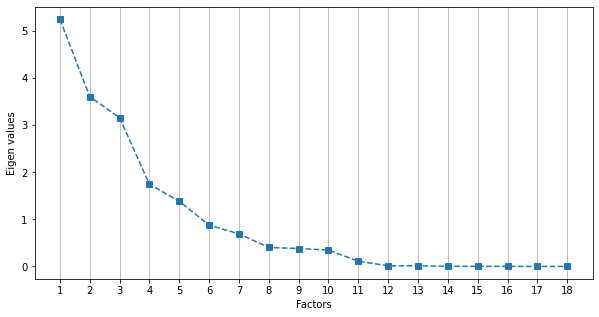

In [33]:
# Applying elbow method to see the variance

plt.figure(figsize=(10,5))
plt.plot(ev, 's--')
plt.xlabel('Factors')
plt.ylabel('Eigen values')
plt.grid(axis='x')
plt.xticks(list(range(len(ev))),list(range(1,len(ev)+1)))
plt.show()

# As per the elbow method we got 8 factors as seen on the above graph

In [34]:
# Now tweeking the factor Analyser


In [35]:
fa= FactorAnalyzer(n_factors = 8, rotation= "varimax")

In [36]:
fa.fit(data)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [37]:
loadings = fa.loadings_

In [38]:
pd.DataFrame(loadings)

,0,1,2,3,4,5,6,7
0,0.916681,0.148854,0.257694,-0.112892,0.226084,-0.010782,0.006479,0.055712
1,-0.019243,0.987373,-0.002557,-0.079440,-0.022145,-0.051505,-0.021551,-0.006474
2,-0.029971,0.993359,0.016937,-0.046725,-0.028004,-0.046266,-0.035877,0.052207
3,-0.022049,0.993580,0.035279,-0.050343,-0.015908,-0.017015,-0.040726,0.043400
4,-0.210534,-0.090150,0.167750,0.944158,0.007221,0.091033,0.126440,0.031928
5,-0.146399,-0.071088,0.152278,0.941874,0.027970,0.100757,0.151099,-0.054178
6,0.342005,-0.021123,0.914049,0.125849,0.118361,0.102523,-0.010990,-0.084820
7,0.335998,-0.026512,0.918167,0.093781,0.093254,0.095828,0.011336,-0.078154
8,0.947007,-0.037567,0.186595,-0.115036,0.224758,-0.047186,-0.020050,0.009395
9,0.935299,-0.039993,0.211985,-0.125497,0.228132,-0.033741,-0.017294,0.005717
